In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
pit_stops_df = pd.read_csv(zf.open('pit_stops.csv'))

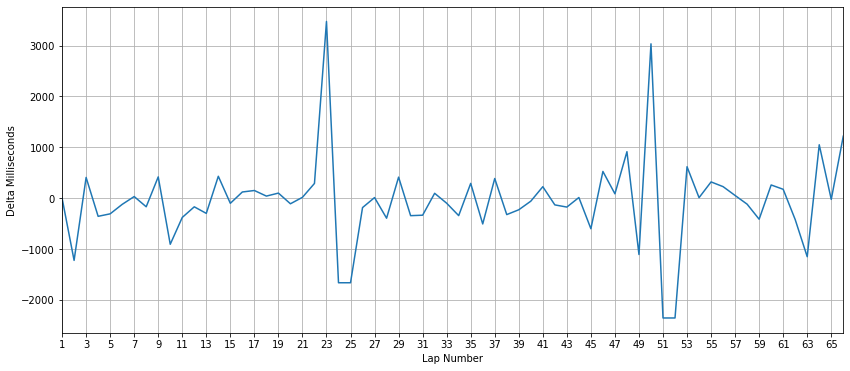

In [2]:
raceId = lap_times_df.raceId.iloc[-1]
race_df = lap_times_df[(lap_times_df.raceId == raceId) & (lap_times_df.driverId == 1)].copy()

for lap in pit_stops_df[(pit_stops_df.raceId == raceId) & (pit_stops_df.driverId == 1)].lap:
    race_df.loc[race_df.lap == lap + 1,'milliseconds'] = np.nan
    mean_value = race_df.loc[race_df.lap.isin([lap, lap + 1, lap + 2])].milliseconds.mean()
    race_df.loc[race_df.lap == lap + 1,'milliseconds'] = mean_value

race_df["delta_milliseconds"] = race_df.milliseconds - race_df.milliseconds.shift()
race_df["delta_milliseconds"] = race_df["delta_milliseconds"].fillna(0)

plt.figure(figsize=(14, 6))    

plt.plot(race_df.lap, 
         race_df.delta_milliseconds)
plt.xticks(np.arange(race_df["lap"].values.min(), race_df["lap"].values.max()+1, 2.0))
plt.xlim(race_df["lap"].values.min(), race_df["lap"].values.max())
plt.grid()
plt.xlabel('Lap Number')
plt.ylabel('Delta Milliseconds')
plt.show()

In [3]:
pit_stops_df

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
7633,1036,822,2,48,16:20:38,22.143,22143
7634,1036,1,2,50,16:23:05,21.853,21853
7635,1036,849,2,49,16:24:00,22.475,22475
7636,1036,154,2,62,16:42:16,24.010,24010
